In [1]:
import tensorflow as tf
from varz.tensorflow import Vars, minimise_l_bfgs_b, minimise_adam
from stheno.tensorflow import GP, EQ, Delta

import numpy as np
import matplotlib.pyplot as plt

from boa.models.gp_model_v2 import GPModel as GPModel_v2
from boa.models.gp import GPModel
from boa.models.gpar_v2 import GPARModel

import GPy

In [2]:
# Target function (noise free).
def f(X):
    return (np.sinc(3 * X) + 0.5 * (X - 0.5)**2).reshape(-1, 1)


# Generate X's and Y's for training.
np.random.seed(42)
X_train = np.array([
    -0.25,
    0,
    0.1,
]).reshape(-1, 1)
Y_train = f(X_train)

In [3]:
# Setup GP model and train.
model = GPModel(kernel='rbf', num_optimizer_restarts=3)
model.set_data(X_train, Y_train)
model.train()

model_v2 = GPModel_v2(kernel='rbf', num_optimizer_restarts=3, verbose=False)
model_v2 = model_v2 | (X_train, Y_train)
model_v2.train()

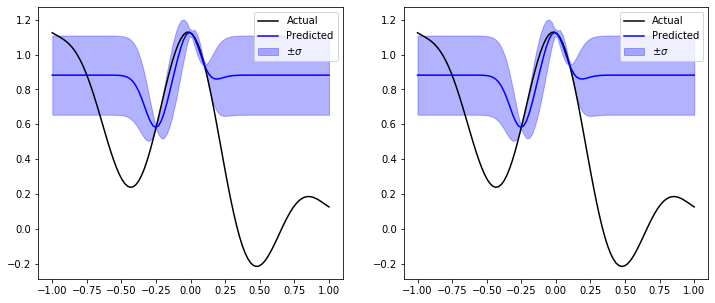

In [4]:
x_candidates = np.linspace(-1, 1, 100).reshape([-1, 1])

pred_mean, pred_var = model.predict_batch(x_candidates)

pred_mean_v2, pred_var_v2 = model_v2.predict_batch(x_candidates)

pred_mean_v2 =  pred_mean_v2.numpy()
pred_var_v2 = pred_var_v2.numpy()

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(x_candidates, f(x_candidates), color='black', label="Actual")
plt.plot(x_candidates, pred_mean, color='blue', label="Predicted")
plt.fill_between(x_candidates.T[0], (pred_mean + np.sqrt(pred_var)).T[0], (pred_mean - np.sqrt(pred_var)).T[0], color='blue', alpha=0.3, label=r"$\pm\sigma$")

plt.legend()

plt.subplot(122)
plt.plot(x_candidates, f(x_candidates), color='black', label="Actual")
plt.plot(x_candidates, pred_mean_v2, color='blue', label="Predicted")
plt.fill_between(x_candidates.T[0], (pred_mean_v2 + np.sqrt(pred_var_v2)).T[0], (pred_mean_v2 - np.sqrt(pred_var_v2)).T[0], color='blue', alpha=0.3, label=r"$\pm\sigma$")

plt.legend()

plt.show()

In [3]:
gpar = GPARModel(kernel='rbf', num_optimizer_restarts=3)

In [4]:
gpar = gpar | (X_train, Y_train)

gpar.variables

[<tf.Variable 'length_scales_dim_0:0' shape=(1,) dtype=float64, numpy=array([1.])>,
 <tf.Variable 'gp_variance_dim_0:0' shape=() dtype=float64, numpy=1.0>,
 <tf.Variable 'noise_variance_dim_0:0' shape=() dtype=float64, numpy=1.0>]

In [7]:
with tf.name_scope("haha"):
    
    m = tf.constant(tf.Variable(tf.ones(1.)).value()) * GP(EQ())
    
    m = m | (X_train, Y_train)

In [6]:
model = Graph()

<tf.Tensor: id=28, shape=(), dtype=float32, numpy=1.0>